**Car Price Prediction Project**


## Importing Libraries

Starting with all the Python libraries I’ll need for analysis, modeling and visualization. Good to have them all organized up front!


In [1]:
# Importing the basic libraries I'll need for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning models and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


## Load the Data

Let’s bring in the dataset and peek at the first few rows. I want to see the features and get an initial feel for what I’m working with.


In [3]:
# Let's load the given car dataset
df = pd.read_csv('car data.csv')

# Let me check the first few rows to understand what I'm dealing with
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Checking Data Info & Nulls

Examining the data types and scanning for null values—an easy step to catch data issues before they cause trouble later.


In [4]:
# Checking the data info to see data types and missing values
df.info()

# Checking if there are any null values – better safe than sorry!
print("Null values in the data:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
Null values in the data:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


## Data Preprocessing

Some features are categorical, so I’ll encode them into numbers so machine learning models can understand them. This helps with accuracy.


In [5]:
# The dataset has some categorical columns, so let's encode them

# Encoding 'Fuel_Type', 'Selling_type', and 'Transmission'
fuel_encoder = LabelEncoder()
df['Fuel_Type'] = fuel_encoder.fit_transform(df['Fuel_Type'])

selling_encoder = LabelEncoder()
df['Selling_type'] = selling_encoder.fit_transform(df['Selling_type'])

trans_encoder = LabelEncoder()
df['Transmission'] = trans_encoder.fit_transform(df['Transmission'])


## Feature Engineering

I’ve noticed from past projects that age of the car affects price, so I’ll create a “CarAge” column from the year. Also, I’ll drop columns that aren’t needed for the prediction process.


In [6]:
# Generally, the age of the car impacts its price quite a lot, so let's create a 'Car_Age' column
df['Car_Age'] = 2025 - df['Year']

# I'll remove columns that don't help prediction much
df = df.drop(['Car_Name', 'Year'], axis=1)


## Exploratory Data Analysis (EDA)

Time to visualize some feature relationships! I always find correlation heatmaps and pairplots helpful when first exploring any dataset.


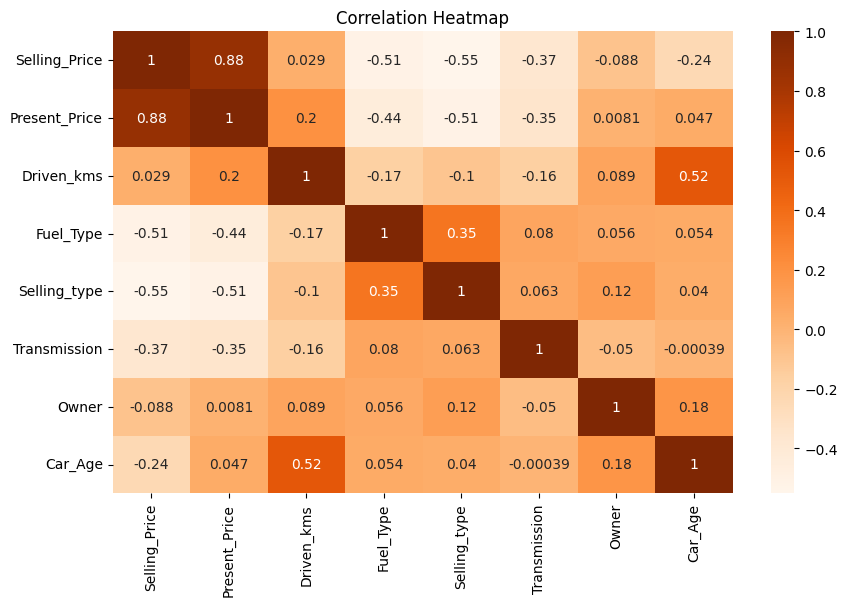

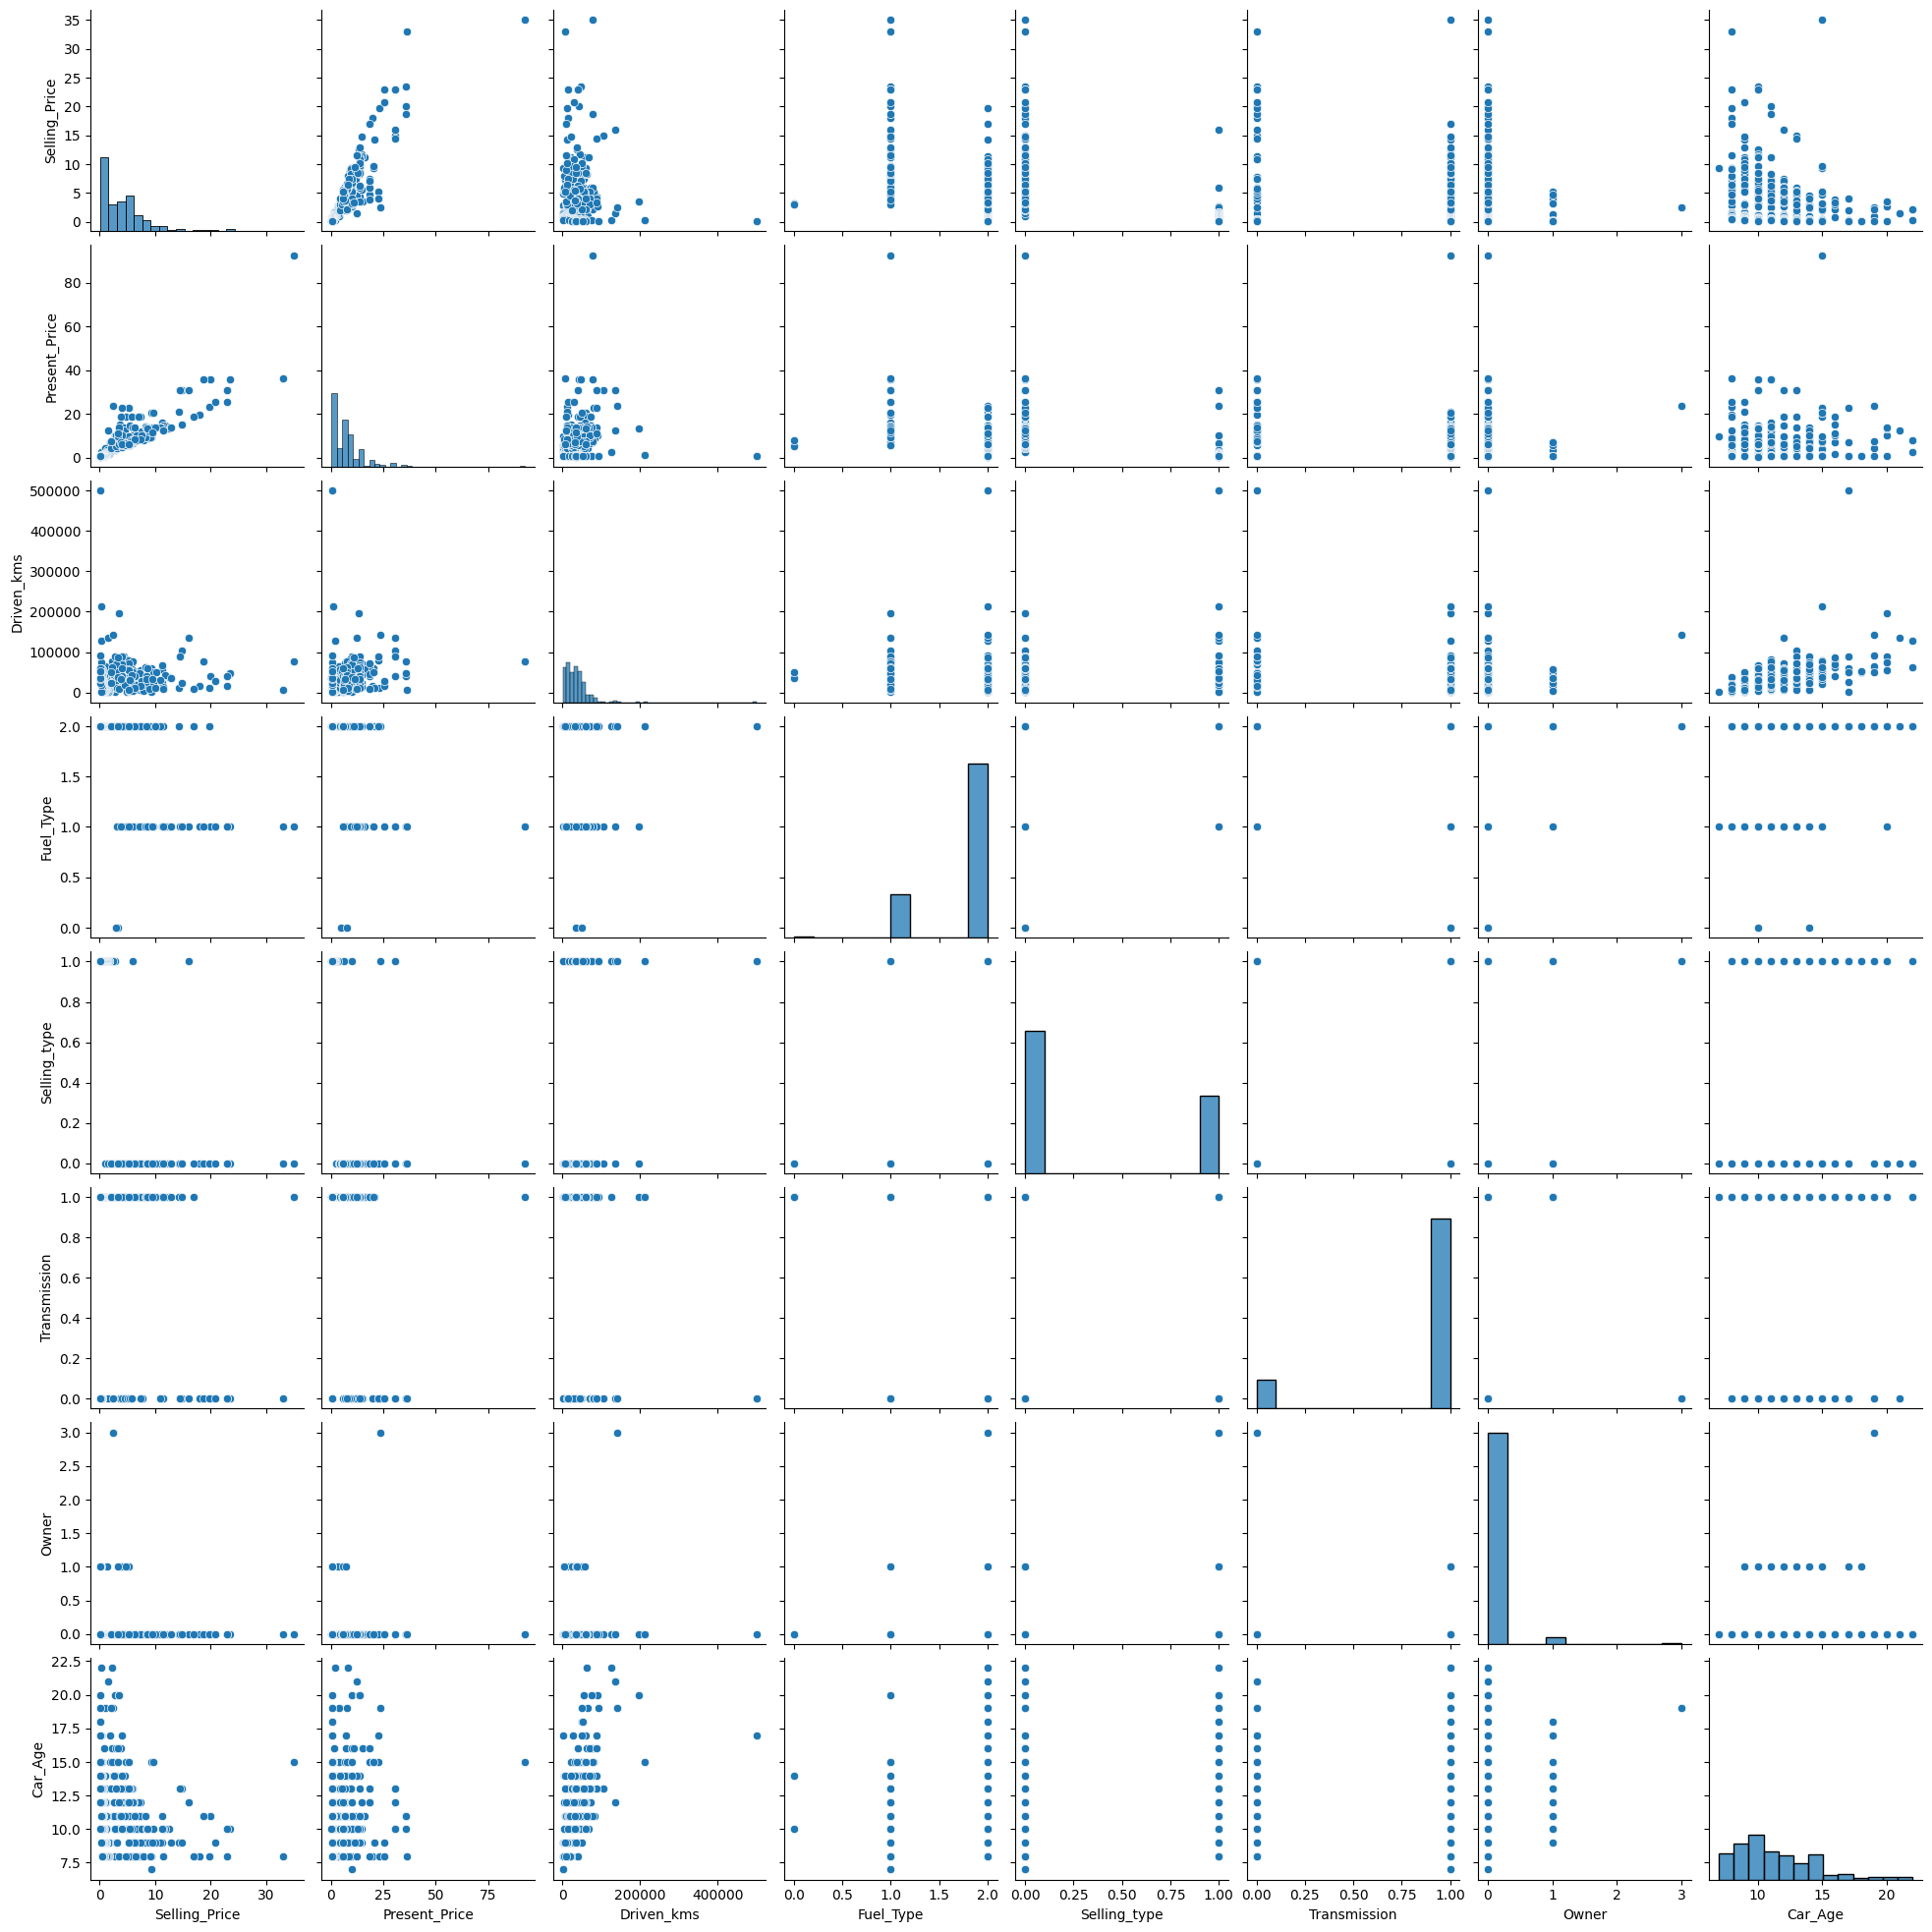

In [7]:
# Let's visualize the relationships between features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='Oranges')
plt.title('Correlation Heatmap')
plt.show()

# I find pairplots useful for a quick overview (this may take a moment if the data is big)
sns.pairplot(df)
plt.show()


## Preparing Data for Modeling

Splitting off the features and labels, and then dividing into training and test sets. This way, I can check how well my models generalize.


In [8]:
# Defining features (X) and target (y)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Splitting into training and test sets (20% test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training and Testing – Linear Regression

First up, I’m trying Linear Regression—a classic starting point for price prediction. I’ll evaluate how well it fits the test data.


In [9]:
# Trying out Linear Regression first
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Results:
MSE: 3.5315798889686376
R2 Score: 0.8466902419663827


## Model Training and Testing – Random Forest

Random Forest has worked well for me on tabular data like this before, so I’m trying it here, and will compare its results to Linear Regression.


In [10]:
# Random Forest usually handles tabular data better, let's try it out
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Results:
MSE: 0.9382767457377043
R2 Score: 0.9592683769360726


## Reflections & Observations

Working on car price prediction was genuinely interesting! I expected mileage (“Driven_kms”) to be the most important factor, but actually, the selling price depends more on current price and car age. Lots to learn here.

I noticed most cars have “Owner” set to 0, which suggests mostly first-hand resales. With more diverse data, that might be a bigger factor.

If I keep going, I’d love to explore:
- Using XGBoost or more advanced models
- Tuning Random Forest’s parameters
- Error analysis for surprising prediction misses

Overall, this project boosted my confidence in ML for real-world data. There’s always more to discover!


## Results Visualization

Finally, I want to see how the models’ predictions compare to actual values. This scatter plot will help me spot where my models are most/least accurate.


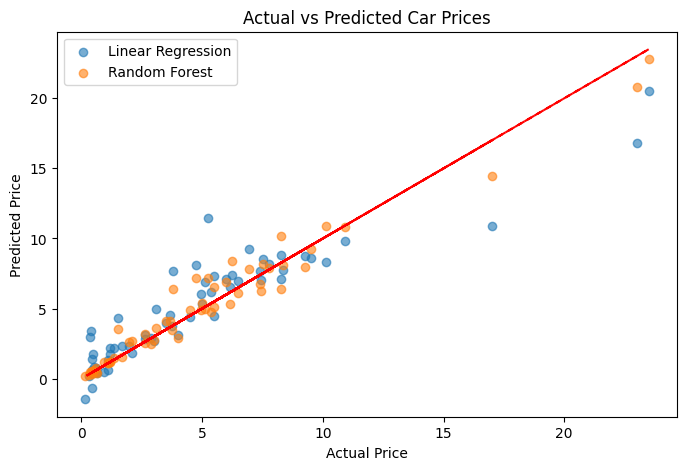

In [11]:
# To see how good the models are, let's plot Actual vs Predicted prices
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.6, label='Linear Regression')
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.title('Actual vs Predicted Car Prices')
plt.show()
